In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import StrMethodFormatter


from src.datasets import load_iris
from src.shadow_learn import ShadowedSetEstimator
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
X, y, y_labels, t = load_iris()
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

def entropy(series, normalize=True):
    freq = series.value_counts(normalize=True)
    # added
    if len(freq) == 1:
        return 0
    e = sum((freq.map(lambda f: -f * np.log2(f))))
    if normalize:
        e /= np.log2(len(freq))
    return e

# Mean of distances

Calcola il valore medio della distanza tra un punto e tutti i punti di ciascun cluster. Se la distanza media dalla propria classe è maggiore della distanza da un altro cluster, il punto è incerto.

In [3]:
unique_labels = np.unique(y_labels)
clusters = {}
for ul in unique_labels:
    i = np.where(y_labels == ul)
    cluster = np.array(X[i])
    clusters[ul] = cluster

In [4]:
uncertains = []
for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_dict = {}
        for inner_key, inner_cluster in clusters.items():
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_dict[inner_key] = np.mean(np.array(distances))
        
        my_cluster_mean = element_dict[key]
        
        for dict_key, mean in element_dict.items():
            if dict_key != key and mean < my_cluster_mean:
                uncertains.append(element)
                break

In [5]:
uncertains

[array([1.28479459, 0.68543919]),
 array([1.46406132, 0.50418983]),
 array([1.55739627, 0.26739258]),
 array([ 1.37873698, -0.42120514]),
 array([ 0.51938325, -1.19135169]),
 array([ 1.34459422, -0.77641543]),
 array([ 1.29832982, -0.76101394]),
 array([ 1.19809737, -0.60557896]),
 array([ 1.25762518, -0.179137  ]),
 array([ 1.29066965, -0.11642525]),
 array([ 1.16885347, -0.1645025 ])]

In [6]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

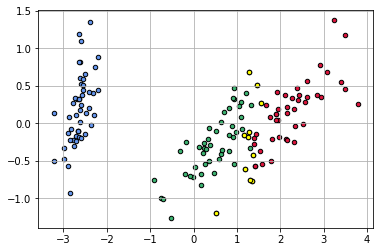

In [7]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Min of distances

Come Mean of distances, ma si prende il valore minimo invece del valore medio.

In [8]:
uncertains = []
for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_dict = {}
        for inner_key, inner_cluster in clusters.items():
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_dict[inner_key] = np.min(np.array(distances))
        
        my_cluster_min = element_dict[key]
        
        for dict_key, other_cluster_min in element_dict.items():
            if dict_key != key and other_cluster_min < my_cluster_min:
                uncertains.append(element)
                break

In [9]:
uncertains

[array([ 1.11624072, -0.08421401]),
 array([ 1.29646885, -0.32756152]),
 array([1.55739627, 0.26739258]),
 array([ 0.51938325, -1.19135169]),
 array([1.66193495, 0.2420384 ]),
 array([ 1.52566363, -0.37502085])]

In [10]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

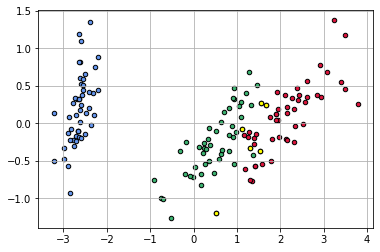

In [11]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Mean or Min of distances

Combinazione delle due metriche precedenti.

In [12]:
uncertains = []
for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_mean_dict = {}
        element_min_dict = {}
        for inner_key, inner_cluster in clusters.items():
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_mean_dict[inner_key] = np.mean(np.array(distances))
            element_min_dict[inner_key] = np.min(np.array(distances))
        
        my_cluster_mean = element_mean_dict[key]
        my_cluster_min = element_min_dict[key]
        
        for dict_key in element_mean_dict:
            if dict_key != key and (element_mean_dict[dict_key] < my_cluster_mean or element_min_dict[dict_key] < my_cluster_min):
                uncertains.append(element)
                break

In [13]:
uncertains

[array([1.28479459, 0.68543919]),
 array([1.46406132, 0.50418983]),
 array([ 1.11624072, -0.08421401]),
 array([ 1.29646885, -0.32756152]),
 array([1.55739627, 0.26739258]),
 array([ 1.37873698, -0.42120514]),
 array([ 0.51938325, -1.19135169]),
 array([1.66193495, 0.2420384 ]),
 array([ 1.34459422, -0.77641543]),
 array([ 1.29832982, -0.76101394]),
 array([ 1.19809737, -0.60557896]),
 array([ 1.25762518, -0.179137  ]),
 array([ 1.29066965, -0.11642525]),
 array([ 1.16885347, -0.1645025 ]),
 array([ 1.52566363, -0.37502085])]

In [14]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

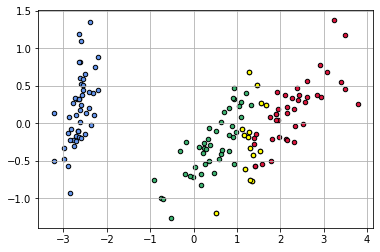

In [15]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Freq mean distances

Calcola il valore medio della distanza di un punto da tutti i punti della propria classe. Determina i punti che si trovano attorno a un punto, a una distanza minore della distanza media del punto dalla propria classe. Se la maggior parte dei punti che giacciono attorno al punto sono di una classe diversa da quella del punto, il punto è incerto.

In [16]:
uncertains = []
for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_mean_dict = {}
        element_min_dict = {}
        for inner_key, inner_cluster in clusters.items():
            # append coppia elemento/distanza per fare un solo ciclo?
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_mean_dict[inner_key] = np.mean(np.array(distances))
            element_min_dict[inner_key] = np.min(np.array(distances))
        
        my_cluster_mean = element_mean_dict[key]
        my_cluster_min = element_min_dict[key]
        #print(key, i)
        #print('mean', element_mean_dict)
        #print('min', element_min_dict)
        
        radius_zone = []
        
        for inner_key, inner_cluster in clusters.items():
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    if dist < my_cluster_mean:
                        radius_zone.append(inner_key)
        
        
        
        key_counts = pd.Series(radius_zone).value_counts(normalize=True)
        key_freqs = key_counts.tolist()
        ent = entropy(pd.Series(radius_zone))
        #key_counts = key_counts.to_dict()
        #print('key_counts', key_counts)
        
        #print('key_freqs', key_freqs)
        #print('entropy', ent)
        '''
        if ent > 0.97:
            uncertains.append(element)
            continue
            
        
        for dict_key, other_cluster_min in element_min_dict.items():
            if dict_key != key and other_cluster_min < my_cluster_min:
                uncertains.append(element)
                break
        
        ''' 
        for dict_key in element_mean_dict:
            #print('kdk', key_counts[dict_key])
            #print('kk', key_counts[key])
            if key != dict_key and dict_key in key_counts and key_counts[dict_key] > key_counts[key]:
                uncertains.append(element)
                break
               
         

In [17]:
uncertains

[array([1.28479459, 0.68543919]),
 array([1.46406132, 0.50418983]),
 array([1.33104142, 0.24466952]),
 array([1.55739627, 0.26739258]),
 array([ 1.37873698, -0.42120514]),
 array([ 0.51938325, -1.19135169]),
 array([ 1.34459422, -0.77641543]),
 array([ 1.29832982, -0.76101394]),
 array([ 1.19809737, -0.60557896]),
 array([ 1.25762518, -0.179137  ]),
 array([ 1.29066965, -0.11642525]),
 array([ 1.16885347, -0.1645025 ])]

In [18]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

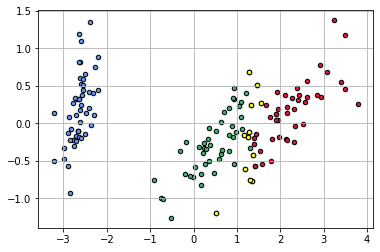

In [19]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Silhouette distances

Determina la minore distanza media di un punto da un cluster diverso da quello a cui appartiene il punto. Sia b_i questa minore distanza media per il punto i. Sia a_i la distanza media del punto dal proprio cluster. Si calcola:

    s_i = b_i - a_i / max(b_i, a_i)
    
Si ottiene un valore compreso tra 1 e -1. Più il valore è vicino a -1, più il punto potrebbe essere ragionevolmente incluso nell'altro cluster. In questo caso se s_i < -0.2 il punto è incerto.

In [20]:
uncertains = []
baryc = {}
for inner_key, inner_cluster in clusters.items():
    matrix = np.array(inner_cluster)
    baryc[inner_key] = matrix.mean(0)
        
#print(baryc)

for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_mean_dict = {}
        element_min_dict = {}
        element_baryc_dict = {}
        for inner_key, inner_cluster in clusters.items():
            
            element_baryc_dict[inner_key] = np.linalg.norm(element - baryc[inner_key])
            
            # append coppia elemento/distanza per fare un solo ciclo?
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_mean_dict[inner_key] = np.mean(np.array(distances))
            element_min_dict[inner_key] = np.min(np.array(distances))
        
        #print(element_baryc_dict)
        
        my_cluster_mean = element_mean_dict[key]
        my_cluster_min = element_min_dict[key]
        #print(key, i)
        #print('mean', element_mean_dict)
        #print('min', element_min_dict)
        
        
        radius_zone = []
        
        for inner_key, inner_cluster in clusters.items():
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    # if dist < element_baryc_dict[inner_key]:
                    if dist < 0.9:
                        radius_zone.append(inner_key)
        
        
        
        key_counts = pd.Series(radius_zone).value_counts(normalize=True)
        key_freqs = key_counts.tolist()
        ent = entropy(pd.Series(radius_zone))
        #key_counts = key_counts.to_dict()
        #print('key_counts', key_counts)
        
        #print('key_freqs', key_freqs)
        #print('entropy', ent)
        '''
        if ent > 0.99:
            uncertains.append(element)
            continue
            
         
        for dict_key, other_cluster_min in element_min_dict.items():
            if dict_key != key and other_cluster_min < my_cluster_min:
                uncertains.append(element)
                break
        '''
        
        other_min = np.inf
        for dict_key in element_mean_dict:
            #print('kdk', key_counts[dict_key])
            #print('kk', key_counts[key])
            #print('key', key)
            #print('dict key', dict_key)
            # key not in key_counts if baryc = element
            '''
            if key != dict_key and dict_key in key_counts and key in key_counts and key_counts[dict_key] > key_counts[key]:
                uncertains.append(element)
                break
            '''
            
            if key != dict_key and element_mean_dict[dict_key] < other_min:
                b_i = element_mean_dict[dict_key]
                other_min = element_mean_dict[dict_key]
        
        a_i = my_cluster_mean
        
        if b_i:
            
           
            # s_i = silhouette
            s_i = (b_i - a_i) / max(b_i, a_i)
            if s_i < -0.2:
                # print(key, i, b_i, a_i, s_i)
                # print(s_i)
                uncertains.append(element)
            
        

In [21]:
uncertains

[array([1.55739627, 0.26739258]),
 array([ 0.51938325, -1.19135169]),
 array([ 1.19809737, -0.60557896]),
 array([ 1.16885347, -0.1645025 ])]

In [22]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

In [23]:
[v for k,v in baryc.items()]

[array([-2.64084076,  0.19051995]),
 array([ 0.53199262, -0.24402963]),
 array([2.10884814, 0.05350968])]

In [24]:
p = np.split(np.array([v for k,v in baryc.items()]), 2, axis=1)
xx2, yy2 = p[0], p[1]
p

[array([[-2.64084076],
        [ 0.53199262],
        [ 2.10884814]]),
 array([[ 0.19051995],
        [-0.24402963],
        [ 0.05350968]])]

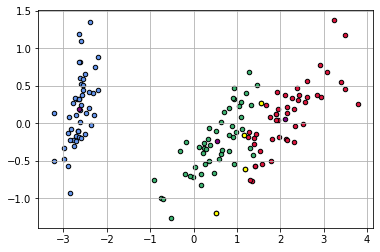

In [25]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.scatter(xx2, yy2, color='purple', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Entropy distances

Si determinano tutti i punti che si trovano entro un raggio da un punto. Il raggio è la più piccola distanza media di un punto da un cluster. Si calcola poi l'entropia dei punti nel raggio: se il valore è superiore a 0.9, il punto è incerto.

In [26]:
uncertains = []
baryc = {}
for inner_key, inner_cluster in clusters.items():
    matrix = np.array(inner_cluster)
    baryc[inner_key] = matrix.mean(0)
        
#print(baryc)

for key, cluster in clusters.items():
    for i, element in enumerate(cluster):
        element_mean_dict = {}
        element_min_dict = {}
        element_baryc_dict = {}
        for inner_key, inner_cluster in clusters.items():
            
            element_baryc_dict[inner_key] = np.linalg.norm(element - baryc[inner_key])
            
            # append coppia elemento/distanza per fare un solo ciclo?
            distances = []
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    distances.append(dist)
            element_mean_dict[inner_key] = np.mean(np.array(distances))
            element_min_dict[inner_key] = np.min(np.array(distances))
        
        #print(element_baryc_dict)
        
        my_cluster_mean = element_mean_dict[key]
        my_cluster_min = element_min_dict[key]
        #print(key, i)
        #print('mean', element_mean_dict)
        #print('min', element_min_dict)
        
        
        radius_zone = []
        
        radius_min = min([v for k,v in element_mean_dict.items()])
        
        for inner_key, inner_cluster in clusters.items():
            for j, inner_element in enumerate(inner_cluster):
                if inner_key != key or i != j:
                    dist = np.linalg.norm(element - inner_element)
                    if dist < radius_min:
                        radius_zone.append(inner_key)
        
        
        
        key_counts = pd.Series(radius_zone).value_counts(normalize=True)
        key_freqs = key_counts.tolist()
        ent = entropy(pd.Series(radius_zone))
        #key_counts = key_counts.to_dict()
        #print('key_counts', key_counts)
        
        #print('key_freqs', key_freqs)
        #print('entropy', ent)
        
        if ent > 0.9:
            uncertains.append(element)
            continue
            
        '''
        for dict_key, other_cluster_min in element_min_dict.items():
            if dict_key != key and other_cluster_min < my_cluster_min:
                uncertains.append(element)
                break
        
        
        other_min = np.inf
        for dict_key in element_mean_dict:
            #print('kdk', key_counts[dict_key])
            #print('kk', key_counts[key])
            #print('key', key)
            #print('dict key', dict_key)
            # key not in key_counts if baryc = element
            
            if key != dict_key and dict_key in key_counts and key in key_counts and key_counts[dict_key] > key_counts[key]:
                uncertains.append(element)
                break
            
            
            if key != dict_key and element_mean_dict[dict_key] < other_min:
                b_i = element_mean_dict[dict_key]
                other_min = element_mean_dict[dict_key]
        
        a_i = my_cluster_mean
        
        if b_i:
            
           
            # s_i = silhouette
            s_i = (b_i - a_i) / max(b_i, a_i)
            if s_i < -0.2:
                print(key, i, b_i, a_i, s_i)
                #print(s_i)
                uncertains.append(element)
        ''' 
        

In [27]:
uncertains

[array([1.28479459, 0.68543919]),
 array([1.46406132, 0.50418983]),
 array([1.08713449, 0.07539039]),
 array([1.09522371, 0.28389121]),
 array([ 0.94236171, -0.54182226]),
 array([ 1.11624072, -0.08421401]),
 array([ 1.29646885, -0.32756152]),
 array([1.33104142, 0.24466952]),
 array([1.55739627, 0.26739258]),
 array([ 1.37873698, -0.42120514]),
 array([1.22042897, 0.40803534]),
 array([ 1.41407223, -0.57492506]),
 array([1.66193495, 0.2420384 ]),
 array([ 1.34459422, -0.77641543]),
 array([ 1.5852673 , -0.53930705]),
 array([ 1.29832982, -0.76101394]),
 array([ 1.19809737, -0.60557896]),
 array([ 1.38766825, -0.20403099]),
 array([ 1.25762518, -0.179137  ]),
 array([ 1.29066965, -0.11642525]),
 array([ 1.4431026 , -0.14380129]),
 array([ 1.16885347, -0.1645025 ]),
 array([ 1.41407223, -0.57492506]),
 array([ 1.52566363, -0.37502085]),
 array([ 1.38966613, -0.28288671])]

In [28]:
r = np.split(np.array(uncertains), 2, axis=1)
xx, yy = r[0], r[1]

In [29]:
[v for k,v in baryc.items()]

[array([-2.64084076,  0.19051995]),
 array([ 0.53199262, -0.24402963]),
 array([2.10884814, 0.05350968])]

In [30]:
p = np.split(np.array([v for k,v in baryc.items()]), 2, axis=1)
xx2, yy2 = p[0], p[1]
p

[array([[-2.64084076],
        [ 0.53199262],
        [ 2.10884814]]),
 array([[ 0.19051995],
        [-0.24402963],
        [ 0.05350968]])]

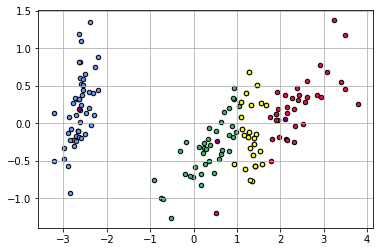

In [31]:
fig, ax = plt.subplots()
for lab, col in zip(labels, label_colors):
    ax.scatter(X[y_labels == lab, 0],
            X[y_labels == lab, 1],
            label=lab,
            c=col, s=20, edgecolors='k')
ax.scatter(xx, yy, color='yellow', s=20, edgecolors='k')
ax.scatter(xx2, yy2, color='purple', s=20, edgecolors='k')
ax.grid(True)

plt.show()

# Homogeneity score

Calcola l'entropia dei punti con predizione = 0, cioè incerti. Problemi.

In [32]:
y_pred = np.array([1, 1, -1, 0, 0, 1, -1, 0, 1, 0, 0, 0])
y_true = ['r', 'r', 'g', 'r', 'g', 'b', 'b', 'b', 'r', 'b', 'g', 'r']

In [33]:
un_pred = np.array([t for t, p in zip(y_true, y_pred) if p == 0])
un_pred

array(['r', 'g', 'b', 'b', 'g', 'r'], dtype='<U1')

In [34]:
np.unique(un_pred)

array(['b', 'g', 'r'], dtype='<U1')

In [35]:
i = np.where(y_pred == 0)
i

(array([ 3,  4,  7,  9, 10, 11], dtype=int64),)

In [36]:
un_p = pd.Series(un_pred).value_counts(normalize=True)
un_p

b    0.333333
r    0.333333
g    0.333333
dtype: float64

In [37]:
ent = entropy(pd.Series(un_pred))
ent

1.0

In [38]:
dy = np.array(['a', 'b', 'c', 'a', 'd', 'b'])
du = np.array(['a', 'b'])
np.mean([el in du for el in dy[[1,2,3,4]]])

0.5

In [39]:
da = np.array([1,2,3,4])
db = np.array([1,3,3,2])
np.mean(da == db)

0.5